### Imports

In [1]:
import math
import numpy as np
import pandas as pd
from top2vec import Top2Vec
import pandas as pd
from csv import writer
import umap
import umap.plot
import matplotlib.pyplot as plt
import csv

c:\Users\Panuskova\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Panuskova\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


#### Parameters

In [2]:
path = "data/lem"
year = "2010_2019"
category = "all"
file_name = year+"_"+category+"_no_names_beletrie"
file_path = path+"/"+file_name + ".txt"
chunk = 2000
divide = "chunk"

### Load dokuments

Three options - chunks, blocks and the whole document 

In [7]:

def load_books_chunks_from_document(CONST, file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    books = []
    books_info = []
    start_tag = '<doc title="'
    end_tag = '</doc>'
    start_index = 0

    while True:
        book_start = content.find(start_tag, start_index)
        if book_start == -1:
            break

        book_end = content.find(end_tag, book_start)
        if book_end == -1:
            break

        book_text = content[book_start:book_end + len(end_tag)]
        book_info = book_text.strip()[5:book_text.index('>') + 1]  # Remove '<doc' and '</doc>'

        book_info_list = book_info.split('" ')
        book_info_dict = {}

        for item in book_info_list:
            key, value = item.split('=')
            book_info_dict[key.strip()] = value.strip('"')

        book_content = book_text[book_text.index('>') + 1:-len(end_tag)].strip()
        book_content = book_content.split(' ')
        length = len(book_content)
        for i in range(math.ceil(length/CONST)):
            i = i*CONST
            end = i+CONST if i+CONST < length-1 else length-1
            books.append(" ".join(book_content[i:end]))
            books_info.append(book_info_dict)

        start_index = book_end + len(end_tag)

    return books, books_info


def load_books_from_document(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    books = []
    books_info = []
    start_tag = '<doc title="'
    end_tag = '</doc>'
    start_index = 0

    while True:
        book_start = content.find(start_tag, start_index)
        if book_start == -1:
            break

        book_end = content.find(end_tag, book_start)
        if book_end == -1:
            break

        book_text = content[book_start:book_end + len(end_tag)]
        book_info = book_text.strip()[5:book_text.index('>') + 1]  # Remove '<doc' and '</doc>'  # Remove '<doc' and '</doc>'

        book_info_list = book_info.split('" ')
        book_info_dict = {}

        for item in book_info_list:
            key, value = item.split('=')
            book_info_dict[key.strip()] = value.strip('"')

        book_content = book_text[book_text.index('>') + 1:-len(end_tag)].strip()        
        books.append(book_content)

        books_info.append(book_info_dict)

        start_index = book_end + len(end_tag)

    return books, books_info



def load_books_blocks_from_document(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    books = []
    books_info = []
    start_tag = '<doc title="'
    end_tag = '</doc>'
    start_index = 0

    while True:
        book_start = content.find(start_tag, start_index)
        if book_start == -1:
            break

        book_end = content.find(end_tag, book_start)
        if book_end == -1:
            break

        book_text = content[book_start:book_end + len(end_tag)]
        book_info = book_text.strip()[5:book_text.index('>') + 1]  # Remove '<doc' and '</doc>'  # Remove '<doc' and '</doc>'

        book_info_list = book_info.split('" ')
        book_info_dict = {}

        for item in book_info_list:
            key, value = item.split('=')
            book_info_dict[key.strip()] = value.strip('"')

        book_content = book_text[book_text.index('>') + 1:-len(end_tag)].strip()
        book_content = book_content.split('\n')
        for book_block in book_content:
            books.append(book_block)
            books_info.append(book_info_dict)

        start_index = book_end + len(end_tag)

    return books, books_info


if divide == "chunk":
    books, books_info = load_books_chunks_from_document(chunk, file_path)
else:    
    books, books_info = load_books_blocks_from_document(file_path)

In [4]:
if divide == "chunk":
    d = str(chunk) + " " + divide
    save_path = "data/models/{divide}/top2vec_".format(divide = d) + file_name
else:
    save_path = "data/models/{divide}/top2vec_".format(divide = "blocks") + file_name    

Save books info 

In [5]:


# with open('data\\books_info_{date}.csv'.format(date = year), 'w', newline='') as f:
#     writer = csv.writer(f)
#     writer.writerows(books_info)

### Create top2vec model

In [6]:

# Create the Top2Vec model
top2vec_model = Top2Vec(documents=books)

top2vec_model.save(save_path)


2023-11-14 10:24:31,938 - top2vec - INFO - Pre-processing documents for training


2023-11-14 10:24:40,616 - top2vec - INFO - Creating joint document/word embedding
2023-11-14 10:38:46,612 - top2vec - INFO - Creating lower dimension embedding of documents
2023-11-14 10:39:08,873 - top2vec - INFO - Finding dense areas of documents
2023-11-14 10:39:08,987 - top2vec - INFO - Finding topics


In [12]:
top2vec_model = Top2Vec.load(save_path)

topic_sizes, topic_nums = top2vec_model.get_topic_sizes()

num_topics = top2vec_model.get_num_topics()

print("Number of topics: ", num_topics)

original_num_topics = num_topics

#for topic_size, topic_num in zip(topic_sizes[:num_topics], topic_nums[:num_topics]):
#    print(f"Topic Num {topic_num} has {topic_size} documents.")

num_topics = 10
reduced = True
ret = top2vec_model.hierarchical_topic_reduction(num_topics=num_topics)

print("Number of topics: ", top2vec_model.get_num_topics(reduced=reduced))

print(ret)
topic_sizes, topic_nums = top2vec_model.get_topic_sizes(reduced=reduced)
for topic_size, topic_num in zip(topic_sizes[:num_topics], topic_nums[:num_topics]):
    print(f"Topic Num {topic_num} has {topic_size} documents.")


Number of topics:  48
Number of topics:  10
[[46, 6, 34, 24, 10, 18, 29, 27, 33, 32, 47, 1], [4, 9, 13, 26, 43, 5], [45, 42, 17, 22, 36, 44, 8], [7, 28, 25, 2], [31, 41, 0], [21, 39, 38, 20], [16, 30, 37, 12], [15, 3], [11, 40, 23], [14, 35, 19]]
Topic Num 0 has 338 documents.
Topic Num 1 has 222 documents.
Topic Num 2 has 181 documents.
Topic Num 3 has 162 documents.
Topic Num 4 has 118 documents.
Topic Num 5 has 114 documents.
Topic Num 6 has 107 documents.
Topic Num 7 has 106 documents.
Topic Num 8 has 95 documents.
Topic Num 9 has 87 documents.


In [8]:
# Get the topics and their document clusters
topic_words, word_scores, topics = top2vec_model.get_topics(num_topics=num_topics, reduced=reduced) # Specify the number of topics you want

topic_number = 0

for words, scores, num in zip(topic_words[topic_number:], word_scores[topic_number:], topics[topic_number:]):
    print(f"Topic {num}")
    for word, score in zip(words, scores):
        print(word, score)


Topic 0
pomalu 0.5670047
citit 0.5286465
zada 0.5157005
pohnout 0.5104471
krk 0.49932826
ret 0.498323
otocit 0.49311602
vterina 0.49050644
tise 0.48882833
dech 0.48409703
rameno 0.48398283
usmat 0.48220828
dlan 0.4810675
pritisknout 0.47645518
oblicej 0.47550014
dychat 0.4701719
upir 0.4698244
zaseptat 0.46766987
srdce 0.46547675
hlesnout 0.46326983
ucho 0.46238187
ucitit 0.46192074
pritahnout 0.4590078
natahnout 0.458438
vsimnout 0.45753878
obejmout 0.45395947
vzduch 0.4536795
prudce 0.45188722
usmev 0.4469387
prst 0.44659156
dotknout 0.44624528
pevne 0.44330937
oprit 0.4423029
svirat 0.44179738
narovnat 0.4396263
dokud 0.43879658
snazit 0.43695506
vykrocit 0.43688768
zrcadlo 0.4367888
pocit 0.43652174
uvedomit 0.435193
opatrne 0.435007
vstat 0.43461406
bolet 0.43277538
trochu 0.4326549
telo 0.43217236
zmizet 0.43052152
vydechnout 0.4300713
okamzik 0.4240389
zvuk 0.4218184
Topic 1
arcibiskup 0.51144695
cirkev 0.5042435
bozi 0.49744195
vule 0.45368645
duse 0.447357
svaty 0.44695488
zkr

In [9]:
documents, document_scores, document_ids = top2vec_model.search_documents_by_topic(topic_num=1, num_docs=10, reduced=reduced)

for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()
 

Document: 478, Score: 0.3764394521713257
-----------
hledat zklamat kapka kýžený informace spadnutí mínit opravdu spadnutí souhlasit usmát fyzika mimoprostor najednou dát bezpečně cestovat vesmír Össeanů zajímavý téma samozřejmě sledovat výzkumný tým A prostor publikovat dělat rešerše zpětně zdaleka kdysi skupinka vědec právě trochu překvapit masakr nikdo napsat napadnout zahynout krev ctihodný zdůraznit zadívat duhovka mimozemšťan vynořovat ostrůvek hněď jazyk jasně oranžový víra protuberance vzápětí začít pronikat ostrý sírový žluť vědět právě tenhle chvějivý proměnlivost nezadržitelný pochytitelný směřování stahovat nezměrný síla pozemšťan Össeanech tolik děsit vědět myslet snažit změnit stejně stát úsilí přece riziko zesměšnění zavřený moci obraz provést cokoli skončit ach : padat koleno třást strachy kéž smět zabít říkat polospánek škubnout pěkný nesmysl usoudit ; rozhodně říci ovšem hlavně muset nalít koňak krk borový naopak zasmát trëighrü stávat žádný čočka nosit kapsa borový z

### Create DF from infos about books

In [10]:
print(books_info)
df_books_info = pd.DataFrame(books_info)
print(df_books_info)

[{'title': 'Život a soužití', 'author': 'Dudová, Gita', 'publisher': 'Baronet', 'first_published': '2010', 'authsex': 'F: žena">'}, {'title': 'Život a soužití', 'author': 'Dudová, Gita', 'publisher': 'Baronet', 'first_published': '2010', 'authsex': 'F: žena">'}, {'title': 'Život a soužití', 'author': 'Dudová, Gita', 'publisher': 'Baronet', 'first_published': '2010', 'authsex': 'F: žena">'}, {'title': 'Život a soužití', 'author': 'Dudová, Gita', 'publisher': 'Baronet', 'first_published': '2010', 'authsex': 'F: žena">'}, {'title': 'Život a soužití', 'author': 'Dudová, Gita', 'publisher': 'Baronet', 'first_published': '2010', 'authsex': 'F: žena">'}, {'title': 'Život a soužití', 'author': 'Dudová, Gita', 'publisher': 'Baronet', 'first_published': '2010', 'authsex': 'F: žena">'}, {'title': 'Život a soužití', 'author': 'Dudová, Gita', 'publisher': 'Baronet', 'first_published': '2010', 'authsex': 'F: žena">'}, {'title': 'Život a soužití', 'author': 'Dudová, Gita', 'publisher': 'Baronet', 'fi

In [10]:
# Convert the topic-document matrix to a format that pyLDAvis understands

data = {}
num_docs = len(books)
for i in range(0, num_topics):
    
    # get score for all documents
    _, document_scores, document_ids = top2vec_model.search_documents_by_topic(topic_num=i, num_docs=topic_sizes[i], reduced=reduced ) #num_docs=num_docs
    
    # iterate doc ids and their score for topic number i
    for score, doc_id in zip(document_scores, document_ids):

        # get book title 
        book_title = books_info[doc_id]['title']
        
        # if book is in keys
        if book_title in data.keys():
            # add score to topic number i
            data[book_title][i] += score 
        else:
            # create list 
            data[book_title] = [0]*num_topics   
            data[book_title][i] += score     

df_dict = {
        'document': data.keys(),
        'topic_contributions': data.values()
        }             

#df = pd.DataFrame.from_dict(data, orient = 'columns')
df = pd.DataFrame.from_dict(df_dict, orient = 'columns')

td_dict = {}

for _, row in df.iterrows():
    topic_distribution = row['topic_contributions']
    document_name = row['document']
    count =  len(df_books_info[df_books_info['title'] == document_name] )
    td_dict[document_name] = [(i/count) for i in topic_distribution]
    



print(td_dict)
df_save = pd.DataFrame.from_dict(td_dict)
df_save.to_excel("data\\topics\\top2vec\\books_topic_cosine_distance_{date}.xlsx".format(date = year))

NameError: name 'topic_sizes' is not defined

In [18]:
print(top2vec_model.doc_top)

ret = top2vec_model.hierarchical_topic_reduction(num_topics=num_topics)

doc_top_reduced = [0] * len(books_info)
for topic_num in range(num_topics): 
    documents, document_scores, document_ids = top2vec_model.search_documents_by_topic(topic_num=topic_num, num_docs=topic_sizes[topic_num], reduced=reduced)
    print(document_ids)
    for document_id in document_ids:
        doc_top_reduced[document_id] = topic_num +1
        books_info[document_id]['topic'] = topic_num +1
doc_top_reduced = np.array(doc_top_reduced)    

df_books_info = pd.DataFrame(books_info)
df_books_info.to_excel('data\\books info\\books_info_{date}.xlsx'.format(date = year))

print(type(top2vec_model.doc_top))

[17 17 17 ... 14 14 14]
[ 306  307  315  304  311  171  303  312  180  301  314  177  302  313
  316  308  182  179  181  173  176  172  178  175  310  170  174  630
  305 1450  624 1449  625  637  632  634 1453  978  309  268  636  847
  277  635  987 1332  975 1469  970 1323 1327 1461 1333  839  281 1454
  983  841 1458  633 1149 1456 1328  275  631 1466 1460 1451 1330 1457
 1468 1459 1467 1322 1465  846  183 1462  844 1340 1264 1463  973  272
  979  450  629  451  269  845  278  279  280 1326  444  984 1342 1261
 1448  849  628 1325 1339 1321   47  838 1278 1334  623 1254 1455 1335
  274  967  977  836  835 1256  273 1280 1204 1331 1269  972 1464 1277
 1145 1197  638  276  445 1231 1491 1324   48  627 1143 1201 1259 1257
 1338 1341 1234  270 1228 1230  982 1151 1255 1260  986  950 1320 1496
 1329   55 1498 1337  626 1272 1258 1202 1225 1250 1336 1495 1154  441
  843  969 1276   50  271 1270  974  842 1262 1502 1229 1452 1223 1198
 1224 1153 1140 1506 1141 1500 1485 1501  949 1247  9

In [13]:
df_books_info = pd.DataFrame(books_info).drop_duplicates() 
df_books_info.set_index('title')


df_save_T = df_save.transpose()

df_books_info_distance = df_books_info.merge(df_save_T, left_on='title', right_index = True, how = 'outer' )
df_books_info_distance.to_excel("data\\topics\\top2vec\\books_info_topic_distance_{date}.xlsx".format(date = year))

c:\Users\Panuskova\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


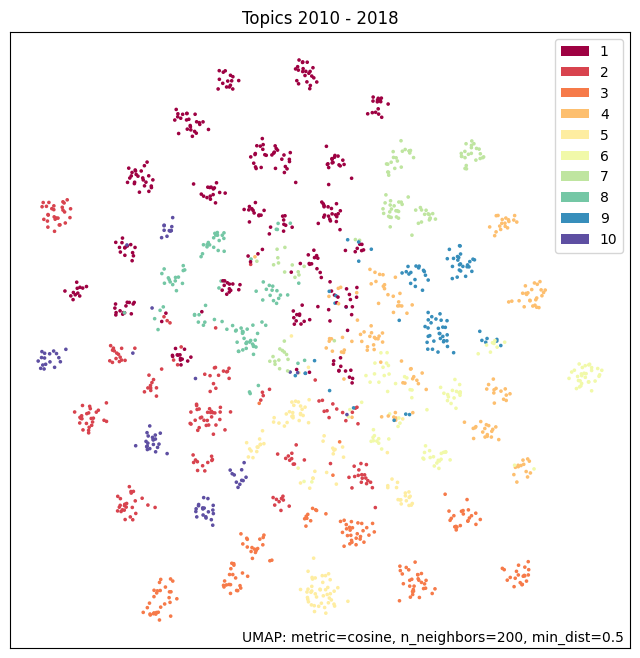

In [19]:
num_topics = 10

top2vec_model = Top2Vec.load(save_path)
ret = top2vec_model.hierarchical_topic_reduction(num_topics=num_topics)


# # Get the document-topic vectors (embeddings)
# embeddings = top2vec_model.get_documents_topics(doc_ids=list(range(0, len(books))))

umap_args_model = {
"n_neighbors": 200,
"n_components": 2,
"metric": "cosine",
'min_dist':0.5,
'spread':1,
'random_state': 42
}
umap_model = umap.UMAP(**umap_args_model).fit(top2vec_model.document_vectors)

umap.plot.points(umap_model, labels=doc_top_reduced ) #


#plt.legend([])

plt.title('Topics 2010 - 2018')

# plt.xlabel('UMAP Dimension 1')
# plt.ylabel('UMAP Dimension 2')
plt.show()

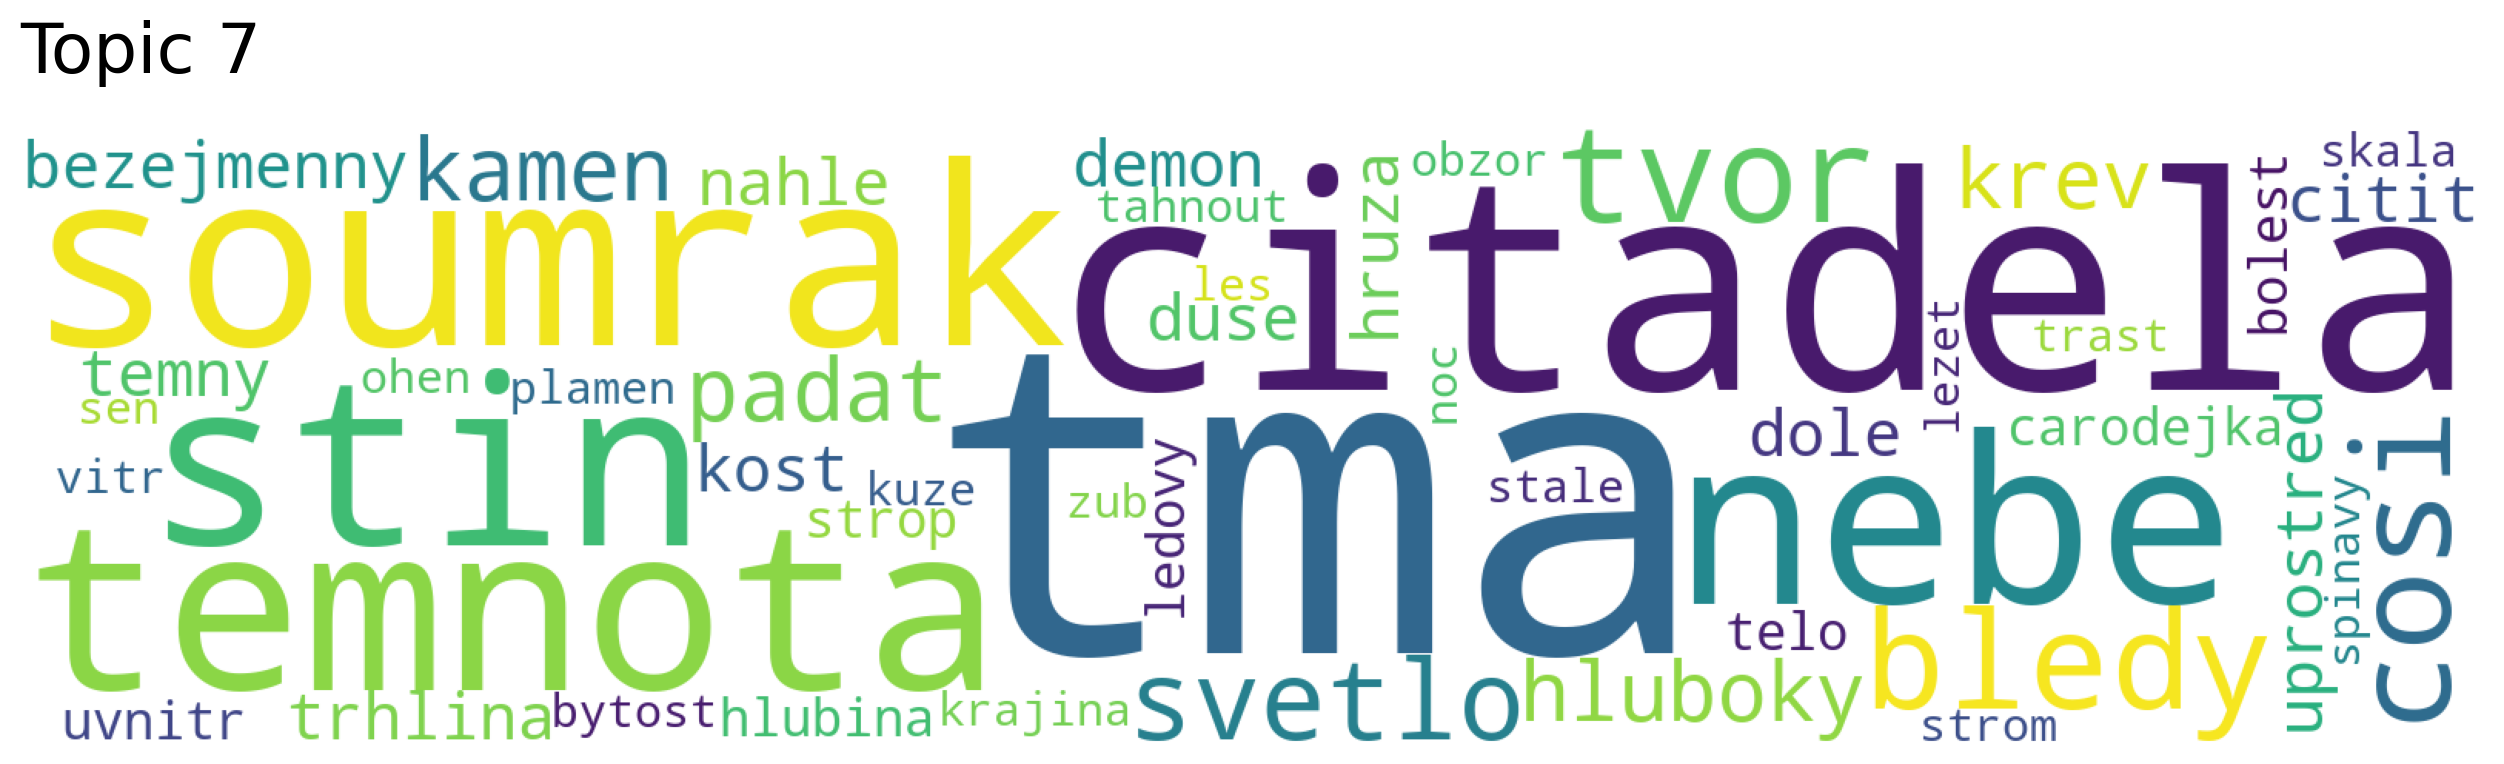

In [15]:
top2vec_model.generate_topic_wordcloud(7, background_color='white', reduced=reduced)